In [1]:
import csv
import os
import numpy as np

import matplotlib.pyplot as plt

In [27]:
folder = "data/"

file1 = "100hz_1ms.csv"

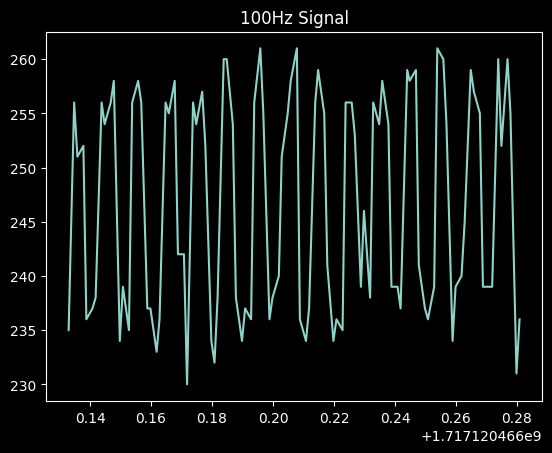

In [28]:
times = []
vals = []

with open(folder+file1, "r") as file:
    for line in file:
        l = line.strip()
        s = l.split(",")
        times.append(float(s[0]))
        vals.append(float(s[1]))

plt.title("100Hz Signal")
plt.plot(times[:100], vals[:100])

In [17]:
t_diffs = []
for i, t in enumerate(times[:-1]):
    t_diffs.append(times[i+1] - t)

np.mean(t_diffs) # seconds

0.0014953784395062752

In [18]:
os.getcwd()

'/Users/tomaitagaki/Documents/GitHub/nrf_read_adc'

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(data, sampling_rate):
    """
    Compute the Fast Fourier Transform of the given data.

    Parameters:
    data (numpy array): The input data to compute the FFT for.
    sampling_rate (int): The rate at which the data was sampled.

    Returns:
    freqs (numpy array): The frequencies corresponding to the FFT.
    fft_values (numpy array): The FFT values.
    """

    # Number of sample points
    N = len(data)

    # Compute the FFT
    fft_values = np.fft.fft(data)

    # Compute the corresponding frequencies
    freqs = np.fft.fftfreq(N, d=1/sampling_rate)

    return freqs, fft_values

def plot_fft(freqs, fft_values, max_freq=200):
    """
    Plot the magnitude of the FFT values for positive frequencies up to max_freq.

    Parameters:
    freqs (numpy array): The frequencies corresponding to the FFT.
    fft_values (numpy array): The FFT values.
    max_freq (int): The maximum frequency to display in the plot.
    """

    # Compute the magnitude of the FFT values
    magnitude = np.abs(fft_values)

    # Filter positive frequencies up to max_freq
    mask = (freqs >= 0) & (freqs <= max_freq)
    freqs = freqs[mask]
    magnitude = magnitude[mask]

    # Plot the FFT values
    plt.figure(figsize=(10, 6))
    plt.plot(freqs, magnitude)
    plt.title('FFT of the Data (up to 200 Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()
if __name__ == "__main__":
    # Example data
    sampling_rate = 1000  # Sample rate in Hz
    t = np.linspace(0, 1, sampling_rate, endpoint=False)  # Time array
    data = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)  # Example data with two sine waves

    # Compute the FFT
    freqs, fft_values = compute_fft(data, sampling_rate)

    # Plot the FFT
    

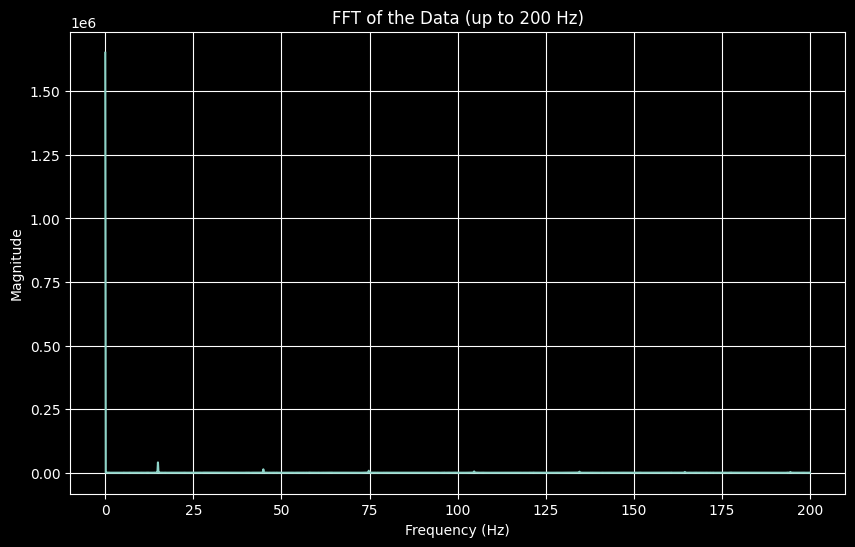

In [20]:
sampling_rate = 1000  # Sample rate in Hz
    
freqs, fft_values = compute_fft(vals, sampling_rate)
plot_fft(freqs, fft_values)


In [10]:
print(freqs[np.argmax(fft_values)])

0.0
